In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle
import re
import nltk
from datetime import datetime as d
import time
import seaborn as sns
import numpy as np
import plotly.express as px
from scipy.stats import norm
print("done")

done


In [11]:
data = pd.read_csv("/Users/danielmurphy/Desktop/nytwit/nytwit_v1.tsv", sep= "\t", header=0)
type(data)


pandas.core.frame.DataFrame

In [12]:
data.shape

(2587, 4)

In [14]:
data.head()

,Time,Word,Category,URL
0,Tue Nov 07 19:12:11 2017,ujigami,filtered,https://www.nytimes.com/2017/11/07/travel/shri...
1,Tue Nov 07 19:12:15 2017,ganbarro,filtered,https://www.nytimes.com/2017/11/07/travel/shri...
2,Tue Nov 07 19:12:25 2017,yamahoko,filtered,https://www.nytimes.com/2017/11/07/travel/shri...
3,Wed Nov 08 10:01:04 2017,rememed,affix,https://www.nytimes.com/2017/11/08/opinion/ang...
4,Wed Nov 08 11:01:14 2017,andpinyon,filtered,https://www.nytimes.com/2017/11/08/sports/nava...


In [15]:
data.tail()

,Time,Word,Category,URL
2582,Thu Mar 28 13:56:25 2019,deadass,affix,http://www.nytimes.com/2019/03/28/arts/music/b...
2583,Thu Mar 28 13:56:27 2019,faaamous,lengthening,http://www.nytimes.com/2019/03/28/arts/music/b...
2584,Thu Mar 28 18:56:34 2019,salpingectomy,domain,http://www.nytimes.com/2019/03/28/parenting/wh...
2585,Thu Mar 28 19:56:14 2019,strrrrrrong,lengthening,http://www.nytimes.com/2019/03/28/books/review...
2586,Thu Mar 28 19:56:23 2019,maminha,filtered,https://www.nytimes.com/2019/03/28/dining/pala...


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2587 entries, 0 to 2586
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Time       2587 non-null   object
 1   Word       2587 non-null   object
 2   Category   2587 non-null   object
 3   URL        2587 non-null   object
dtypes: object(4)
memory usage: 81.0+ KB


In [25]:
data.describe(include=np.object)

,Time,Word,Category,URL
count,2587,2587,2587,2587
unique,2584,2584,19,2157
top,Thu May 31 10:03:18 2018,🍑to,filtered,https://www.nytimes.com/2019/03/19/magazine/ho...
freq,2,2,1034,6


In [43]:
freqeuncy_category = data['Category '].value_counts()
print(freqeucny_category[:])

filtered         1034
affix             475
domain            260
deriv             211
blend             183
compound comp     123
compound new       54
lengthening        53
infl               51
dialect            46
onomatopoeia       23
variant            16
affix libfix       15
archaic            13
innovation         11
synth               6
phonaestheme        6
spaces sic          5
infix               2
Name: Category , dtype: int64


In [54]:
fig = px.histogram(data, x = 'Category ', title="Frequency of Categories in NYT Dataset", labels={'x':'Category'})
fig.show()

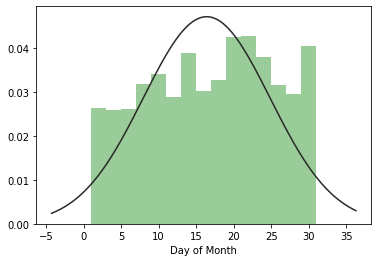

In [87]:
date_df = []
for val in df['Time']:
    date_df.append(val[8:10])
date_df = pd.Series(date_df, name = "Day of Month")
sns.distplot(date_df, kde = False, fit = norm, color = "g")
